# Machine Learning Lab 3: Unsupervised Learning

## Oleksii Verkhola, DA-12, 2024

Importing the modules and data used in this lab.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

Let's analyze the data for unneeded columns.

In [3]:
print(f'Training Data shape: {train_data.shape}')
train_data.sample(10)

Training Data shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
309,310,1,1,"Francatelli, Miss. Laura Mabel",female,30.0,0,0,PC 17485,56.9292,E36,C
344,345,0,2,"Fox, Mr. Stanley Hubert",male,36.0,0,0,229236,13.0000,NaN,S
627,628,1,1,"Longley, Miss. Gretchen Fiske",female,21.0,0,0,13502,77.9583,D9,S
778,779,0,3,"Kilgannon, Mr. Thomas J",male,NaN,0,0,36865,7.7375,NaN,Q
353,354,0,3,"Arnold-Franchi, Mr. Josef",male,25.0,1,0,349237,17.8000,NaN,S
465,466,0,3,"Goncalves, Mr. Manuel Estanslas",male,38.0,0,0,SOTON/O.Q. 3101306,7.0500,NaN,S
376,377,1,3,"Landergren, Miss. Aurora Adelia",female,22.0,0,0,C 7077,7.2500,NaN,S
652,653,0,3,"Kalvik, Mr. Johannes Halvorsen",male,21.0,0,0,8475,8.4333,NaN,S
720,721,1,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S
378,379,0,3,"Betros, Mr. Tannous",male,20.0,0,0,2648,4.0125,NaN,C


We can look through the definitions for the columns to determine whether to keep or discard the data

1. PassengerId - Passenger ID
2. Survived - Survival (0 = No; 1 = Yes)
3. Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
4. Name - Name
5. Sex - Sex
6. Age - Age
7. Sibsp - Number of Siblings/Spouses Aboard
8. Parch - Number of Parents/Children Aboard
9. Ticket - Ticket Number
10. Fare - Passenger Fare
11. Cabin - Cabin
12. Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

We can discard the Name, Ticket Number, Cabin and the Port of Embarkation, as they realistically shouldn't affect the passenger survivability too much.
We can also merge the number of siblings/spouses and the number of parents/children aboard into a single column named FamMem (Family Members). We could also remove these columns entirely, but if a passenger has many family members, they may spend more time trying to rescue them all, and dying in the process. Or, they could be helped by their family members, improving their survivability. That's what we're here to find, after all!

In [4]:
train_data = train_data.drop(columns=['Name', 'Ticket', 'Cabin', 'Embarked'])
train_data['FamMem'] = train_data['SibSp'] + train_data['Parch']
train_data = train_data.drop(columns=['SibSp', 'Parch'])
train_data.sample(5)

,PassengerId,Survived,Pclass,Sex,Age,Fare,FamMem
351,352,0,1,male,NaN,35.0000,0
232,233,0,2,male,59.0,13.5000,0
412,413,1,1,female,33.0,90.0000,1
524,525,0,3,male,NaN,7.2292,0
753,754,0,3,male,23.0,7.8958,0


In [5]:
test_data = test_data.drop(columns=['Name', 'Ticket', 'Cabin', 'Embarked'])
test_data['FamMem'] = test_data['SibSp'] + test_data['Parch']
test_data = test_data.drop(columns=['SibSp', 'Parch'])
test_data.sample(5)

,PassengerId,Pclass,Sex,Age,Fare,FamMem
204,1096,2,male,25.0,10.5000,0
223,1115,3,male,21.0,7.7958,0
410,1302,3,female,NaN,7.7500,0
69,961,1,female,60.0,263.0000,5
294,1186,3,male,36.0,9.5000,0


Let's tests the set for duplicate data.

In [6]:
train_data[train_data.duplicated()]

,PassengerId,Survived,Pclass,Sex,Age,Fare,FamMem


In [7]:
test_data[test_data.duplicated()]

,PassengerId,Pclass,Sex,Age,Fare,FamMem


Lucky, none of them have duplicates!

Let's transform the categorical data into numerical.

In [8]:
print(train_data.dtypes.value_counts())

int64      4
float64    2
object     1
Name: count, dtype: int64


Specifically, the gender. Since it's a simple male/female => 0/1 conversion, it can be done manually.

In [9]:
train_data['Sex'] = train_data['Sex'].replace('female', '1')
train_data['Sex'] = train_data['Sex'].replace('male', '0')
train_data['Sex'] = pd.to_numeric(train_data['Sex'])
train_data

,PassengerId,Survived,Pclass,Sex,Age,Fare,FamMem
0,1,0,3,0,22.0,7.2500,1
1,2,1,1,1,38.0,71.2833,1
2,3,1,3,1,26.0,7.9250,0
3,4,1,1,1,35.0,53.1000,1
4,5,0,3,0,35.0,8.0500,0
...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,13.0000,0
887,888,1,1,1,19.0,30.0000,0
888,889,0,3,1,NaN,23.4500,3
889,890,1,1,0,26.0,30.0000,0


In [10]:
test_data['Sex'] = test_data['Sex'].replace('female', '1')
test_data['Sex'] = test_data['Sex'].replace('male', '0')
test_data['Sex'] = pd.to_numeric(test_data['Sex'])
test_data

,PassengerId,Pclass,Sex,Age,Fare,FamMem
0,892,3,0,34.5,7.8292,0
1,893,3,1,47.0,7.0000,1
2,894,2,0,62.0,9.6875,0
3,895,3,0,27.0,8.6625,0
4,896,3,1,22.0,12.2875,2
...,...,...,...,...,...,...
413,1305,3,0,NaN,8.0500,0
414,1306,1,1,39.0,108.9000,0
415,1307,3,0,38.5,7.2500,0
416,1308,3,0,NaN,8.0500,0


In [11]:
print(train_data.dtypes.value_counts())

int64      5
float64    2
Name: count, dtype: int64


Now, let's test the sets for missing data:


In [12]:
train_missing = train_data.isnull().sum().loc[lambda x : x>0].sort_values(ascending=False).to_frame(name='Missing % from total')
print(train_missing / len(train_data) * 100.0)
print("=========================")
train_data.isnull().sum()

     Missing % from total
Age              19.86532


PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
Fare             0
FamMem           0
dtype: int64

In [13]:
test_missing = test_data.isnull().sum().loc[lambda x : x>0].sort_values(ascending=False).to_frame(name='Missing % from total')
print(test_missing / len(test_data) * 100.0)
print("=========================")
test_data.isnull().sum()

      Missing % from total
Age              20.574163
Fare              0.239234


PassengerId     0
Pclass          0
Sex             0
Age            86
Fare            1
FamMem          0
dtype: int64

Both values are already numerical, so we can fill them out using the means in their respective columns.

In [14]:
from sklearn.impute import SimpleImputer

temp = train_data['Survived']
train_data = train_data.drop(columns=['Survived'])

simple_imputer = SimpleImputer(strategy='mean')
train_data = pd.DataFrame(simple_imputer.fit_transform(train_data), columns = train_data.columns)
test_data = pd.DataFrame(simple_imputer.transform(test_data), columns = test_data.columns)

train_data['Survived'] = temp

train_data.isnull().sum()
test_data.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           0
FamMem         0
dtype: int64

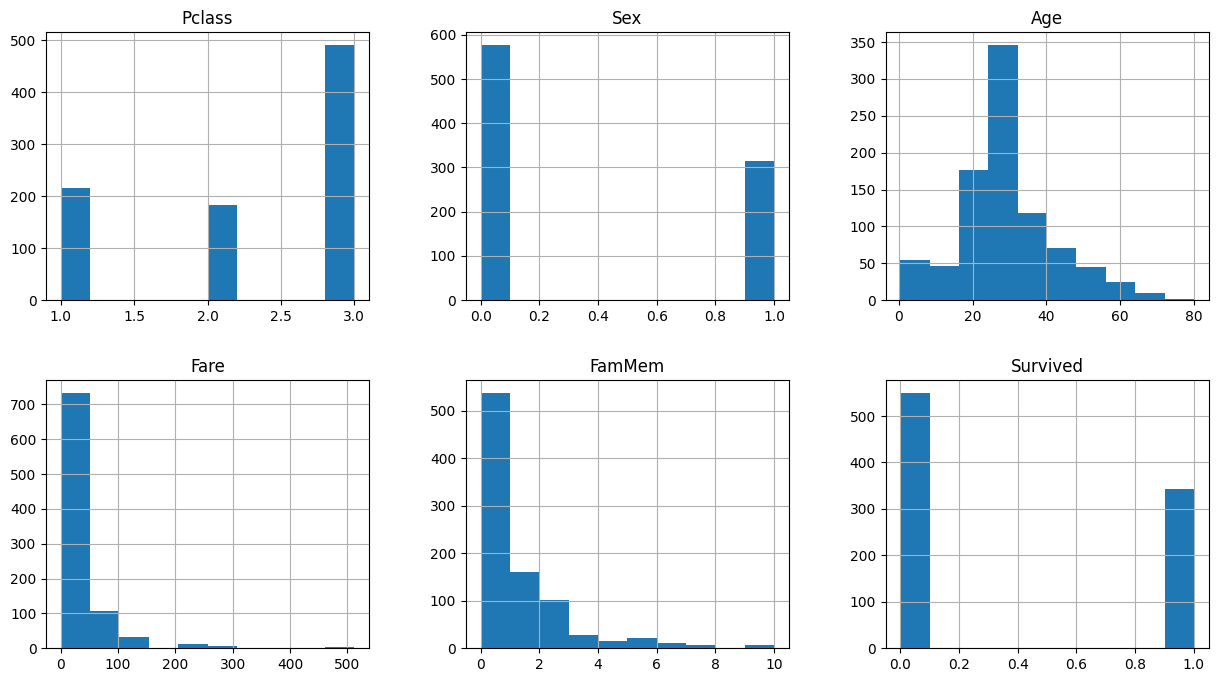

In [24]:
train_data.drop(columns=['PassengerId']).hist(figsize=(15, 8), layout=(2, 3))
plt.show()